In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
from sklearn.datasets import load_iris

In [17]:
col_names =['sepal_length','sepal_width','petal_length','petal_width','species']
iris = pd.read_csv('../Data/iris.csv', header=None, names =col_names)

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


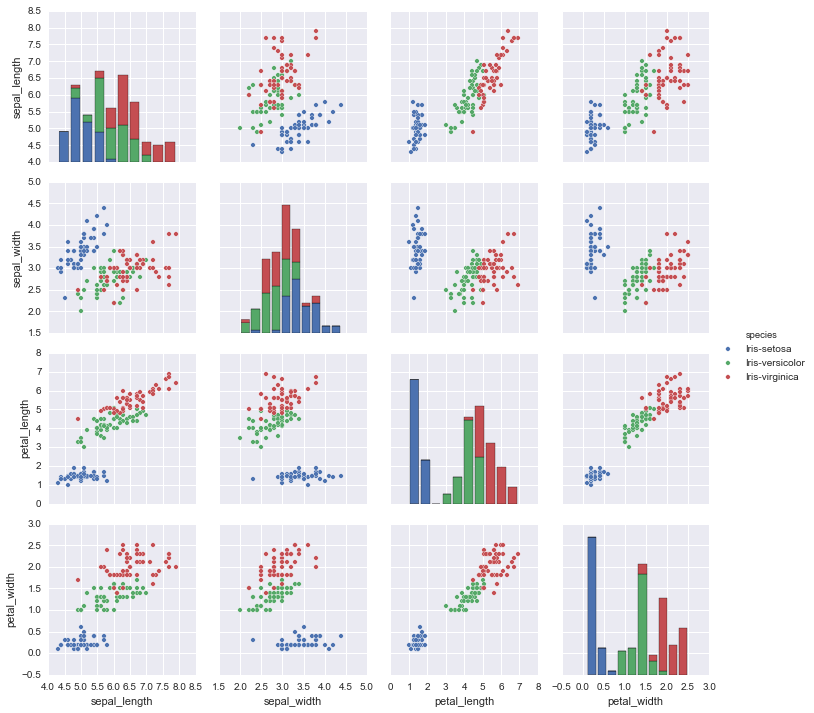

In [22]:
sns.pairplot(iris, hue='species');

In [23]:
X = iris.values[:, :4]
y = iris.values[:, 4]

In [24]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=0)

In [25]:
lr = LogisticRegressionCV()
lr.fit(train_X, train_y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [26]:
print("Accuracy = {:.2f}".format(lr.score(test_X, test_y)))

Accuracy = 0.83


In [27]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array(train_y)
test_y_ohe = one_hot_encode_object_array(test_y)

In [34]:
model = Sequential()
model.add(Dense(16, input_shape=(4,)))
model.add(Activation('sigmoid'))

model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [35]:
model.fit(train_X, train_y_ohe, nb_epoch=100, batch_size=1, verbose=0);

In [36]:
loss, accuracy = model.evaluate(test_X, test_y_ohe, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.99
